# Analysis flow cytometry data Sysmex (BloodCounts Project)

**Background**: Pilot data is provided from a cohort of COVID patients at the VUMC location, some with pulmonary embolisms. Data is obtained from blood sampling and analysed using Sysmex software. In addition to the regular full blood count, additional information is provided after decryption by Sysmex including flow cytometry data. Respective data is of the cohort is retrieved after permission of lead investigators and extracted based on SampleIds via the Research Data Platform overseen by the Business Intellegence Department (jira ticket:VUBI-8429). Sample data was subsequently extracted by the TraiL in .116 files before decryption by Sysmex.

**Analysis**: Perform exploratory data analysis of the flow cytometry FCS files

**Date**:        15-02-2024

**Author**:      Stephan van der Zwaard

## 1) Set-up environment

In [55]:
# Load required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import flowkit as fk
import bokeh
from bokeh.plotting import show

bokeh.io.output_notebook()
%matplotlib inline

# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading BokehJS ...

## 2) Load data from FSC-file and Flowkit

### WDF type

In [14]:
# Check file path
os.path.exists(os.getcwd()+'/testfiles_AMS/[XN-10^24746][00-22_123][20201002_155412][          205276124803][WDF].fcs')


True

In [74]:
#--------------------- WDF ---------------------------
# Read data from fcs file with FlowKit
fcs_path = os.getcwd()+'/testfiles_AMS/[XN-10^24746][00-22_123][20201002_155412][          205276124803][WDF].fcs'
sample   = fk.Sample(fcs_path)
sample

Sample(v3.0, [XN-10^24746][00-22_123][20201002_155412][          205276124803].116, 4 channels, 8306 events)

## 3) First inspection of the data

In [81]:
# Inspect the data
print('Version:')
print(sample.version)

print('\nChannel labels:')
print(sample.pnn_labels)
print(sample.pns_labels)

print('\nMetadata:')
print(sample.get_metadata())

Version:
3.0

Channel labels:
['SSC', 'SFL', 'FSC', 'FSCW']
['Side Scatter Signal', 'Side Fluorescence Signal', 'Forward Scatter Signal', 'Forward Scatter Pulse Width Signal']

Metadata:
{'beginanalysis': '0000000000', 'begindata': '0000000741', 'beginstext': '0000000000', 'byteord': '1,2,3,4', 'datatype': 'I', 'endanalysis': '0000000000', 'enddata': '0000033964', 'endstext': '0000000000', 'mode': 'L', 'nextdata': '0000000000', 'tot': '8306', 'par': '4', 'p1b': '8', 'p1e': '0,0', 'p1n': 'SSC', 'p1r': '256', 'p1s': 'Side Scatter Signal', 'p2b': '8', 'p2e': '0,0', 'p2n': 'SFL', 'p2r': '256', 'p2s': 'Side Fluorescence Signal', 'p3b': '8', 'p3e': '0,0', 'p3n': 'FSC', 'p3r': '256', 'p3s': 'Forward Scatter Signal', 'p4b': '8', 'p4e': '0,0', 'p4n': 'FSCW', 'p4r': '256', 'p4s': 'Forward Scatter Pulse Width Signal', 'cells': 'WB', 'com': 'Sysmex', 'cyt': 'XN-10', 'cytsn': '24746', 'date': '02-OKT-2020', 'etim': '15:54:12', 'fil': '[XN-10^24746][00-22_123][20201002_155412][          205276124803

In [82]:
print('Channels:')
sample.channels

Channels:


,channel_number,pnn,pns,png,pne,pnr
0,1,SSC,Side Scatter Signal,1.0,"(0.0, 0.0)",256.0
1,2,SFL,Side Fluorescence Signal,1.0,"(0.0, 0.0)",256.0
2,3,FSC,Forward Scatter Signal,1.0,"(0.0, 0.0)",256.0
3,4,FSCW,Forward Scatter Pulse Width Signal,1.0,"(0.0, 0.0)",256.0


In [83]:
sample.subsample_indices

array([8020,  311, 6299, ...,  905, 5192,  235])

In [ ]:
sample.subsample_indices

### Retrieve as dataframe


In [65]:
#Retrieve FSC data as pandas dataframe
df = sample.as_dataframe(source='raw')

In [64]:
#Check summary stats from FSC data
df.describe()

pnn,SSC,SFL,FSC,FSCW
pns,Side Scatter Signal,Side Fluorescence Signal,Forward Scatter Signal,Forward Scatter Pulse Width Signal
count,8306.000000,8306.000000,8306.000000,8306.000000
mean,118.638093,54.647965,65.024561,17.713821
std,42.253733,36.024055,25.888026,5.547917
min,14.000000,0.000000,11.000000,2.000000
25%,77.000000,43.000000,54.000000,17.000000
50%,139.000000,52.000000,69.000000,20.000000
75%,155.000000,65.000000,84.000000,21.000000
max,255.000000,255.000000,255.000000,133.000000


## 4) Visualize FSC data

In [78]:
p= sample.plot_histogram('SSC', source='raw')
show(p)

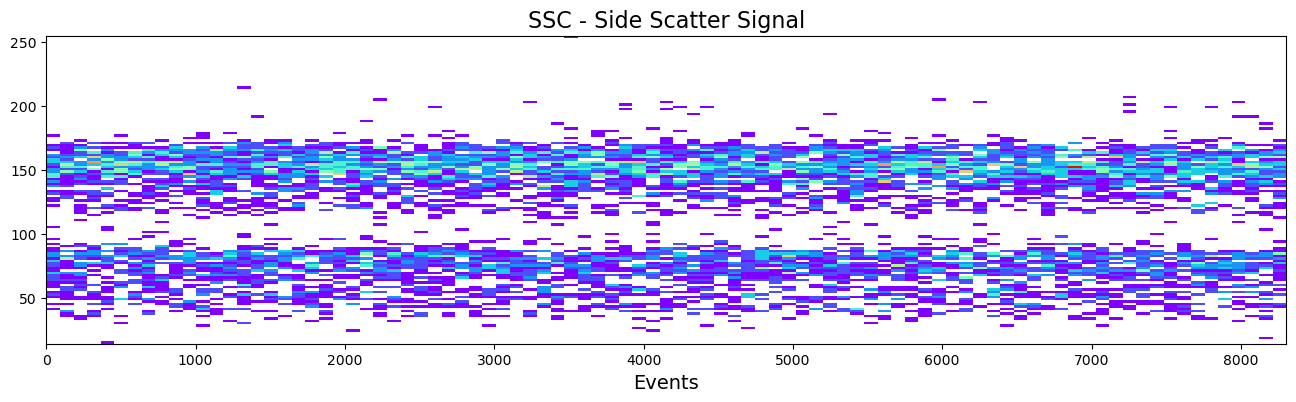

In [79]:
# Plot channel data
f = sample.plot_channel('SSC', source='raw')
plt.show(f)

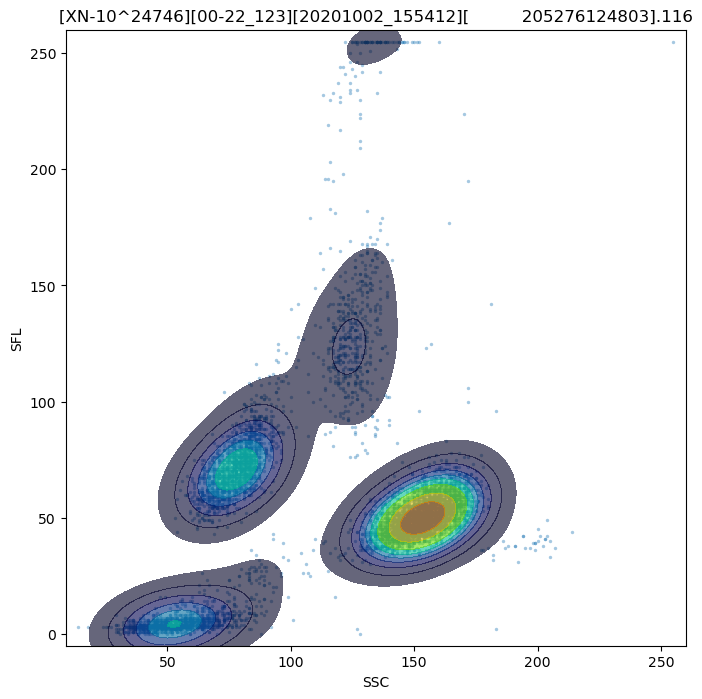

In [80]:
f = sample.plot_contour('SSC','SFL', fill=True,  source='raw', plot_events = True)
plt.show(f)

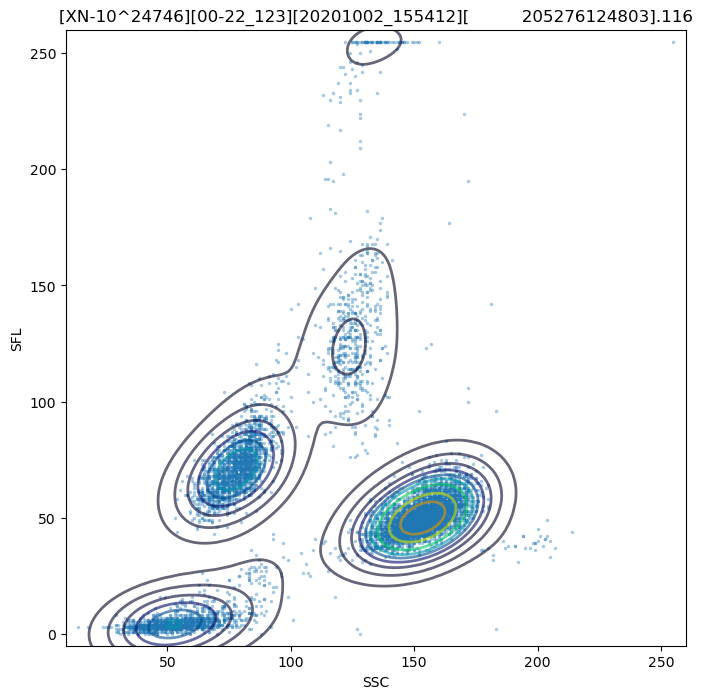

In [59]:
f = sample.plot_contour('SSC','SFL', source='raw', plot_events = True)
plt.show(f)

## 4) Explore other FSC file types [WNR, WPC]

### WNR type

In [66]:
# Check data and contour plot for WNR-file
fcs_path = os.getcwd()+'/testfiles_AMS/[XN-10^24746][00-22_123][20201017_074618][          205291013703][WNR].fcs'
sample   = fk.Sample(fcs_path)
df = sample.as_dataframe(source='raw')
df.describe()

pnn,SFL,FSC,SSC,FSCW
pns,Side Fluorescence Signal,Forward Scatter Signal,Side Scatter Signal,Forward Scatter Pulse Width Signal
count,4359.000000,4359.000000,4359.000000,4359.000000
mean,137.273457,79.013765,75.967653,22.113099
std,41.738126,32.824184,24.280167,6.234209
min,0.000000,3.000000,0.000000,2.000000
25%,141.000000,71.000000,70.000000,23.000000
50%,146.000000,85.000000,79.000000,24.000000
75%,152.000000,100.000000,87.000000,25.000000
max,255.000000,255.000000,255.000000,85.000000


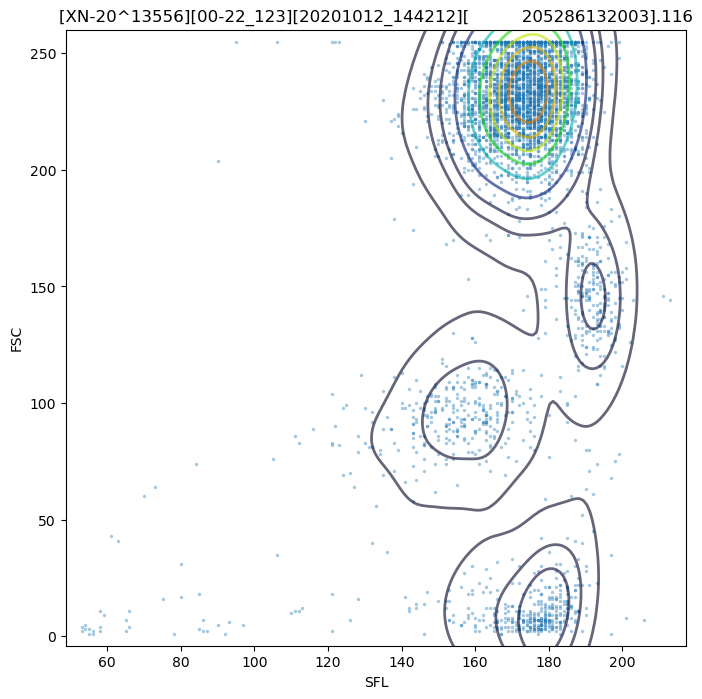

In [72]:
f = sample.plot_contour('SFL','FSC', source='raw', plot_events = True)
plt.show(f)

### WPC type

In [84]:
# Check data and contour plot for WPC-file
fcs_path = os.getcwd()+'/testfiles_AMS/[XN-20^13556][00-22_123][20201012_144212][          205286132003][WPC].fcs'
sample   = fk.Sample(fcs_path)
df = sample.as_dataframe(source='raw')
df.describe()

pnn,SSC,SFL,FSC,FSCW
pns,Side Scatter Signal,Side Fluorescence Signal,Forward Scatter Signal,Forward Scatter Pulse Width Signal
count,4336.000000,4336.000000,4336.000000,4336.000000
mean,179.426199,171.678967,196.724400,38.440268
std,49.227688,15.122728,72.733375,4.876101
min,14.000000,53.000000,1.000000,4.000000
25%,181.000000,166.000000,202.000000,38.000000
50%,199.000000,174.000000,227.000000,40.000000
75%,210.000000,180.000000,241.000000,41.000000
max,255.000000,213.000000,255.000000,94.000000


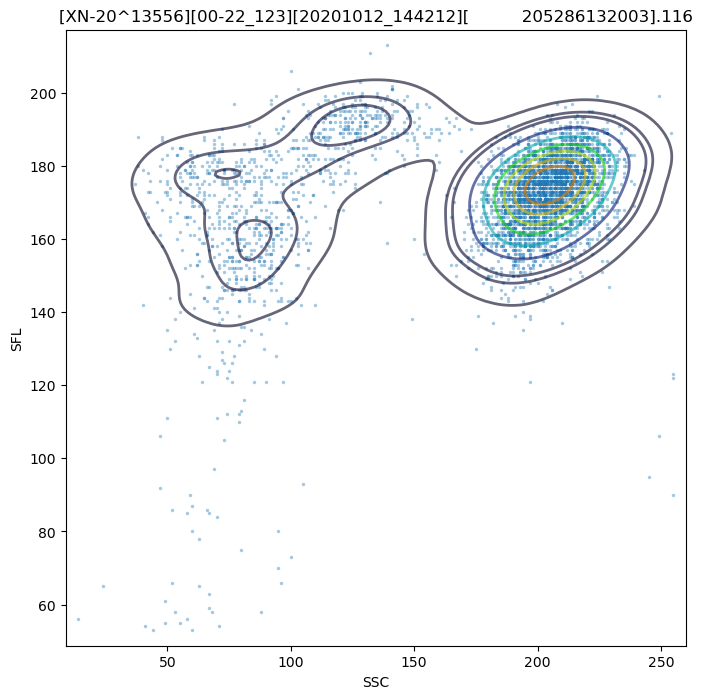

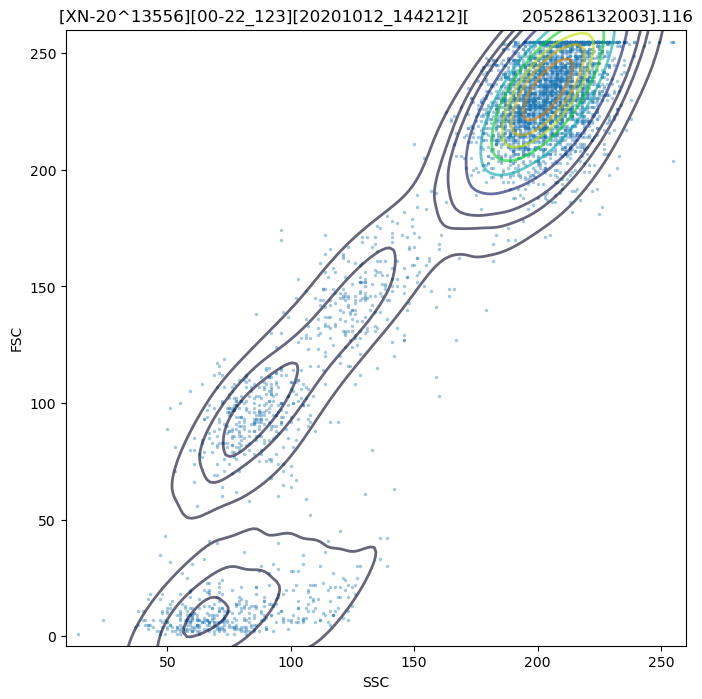

In [71]:
f = sample.plot_contour('SSC','SFL', source='raw', plot_events = True)
plt.show(f)

f = sample.plot_contour('SSC','FSC', source='raw', plot_events = True)
plt.show(f)

In [ ]:
# Inspect data
#df_events = sample.as_dataframe(source='raw')
#sample_from_df = fk.Sample(df_events, sample_id = 'my_sample_from_df')
#sample_from_df

#np_events = sample.get_events(source='raw')
#channel_labels = sample.pnn_labels
#sample_from_np = fk.Sample(np_events, channel_labels = channel_labels, sample_id = 'my_sample_from_numpy')
#sample_from_np